# Pima-Indians-diabetes

About this file
This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within few years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

##  Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### 2.1 Importing the dataset(pima-indians-diabetes.data)

In [2]:
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pid=pd.read_csv('../datasets/pima-indians-diabetes (1).data',header=None,names=col_names)
pid.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In the above Table Label indicated if the patient is Diabetic or not
If the value is one then patient is Diabetic and 0 Means non Diabetic

### 2.2 Find out the feature columns

In [3]:
pid.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

In [4]:
feature_columns=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']

### 2.3 Extract the independent variable X and dependent variable Y? 

In [5]:
x=pid[feature_columns]
y=pid.label

### 2.4 Split the data into train and test set:(70/30)     

In [6]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=1)
x_train.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


### 2.5 Train a Logistic model?  

In [7]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()

model.fit(x_train,y_train)

LogisticRegression()

### 2.6 Predict the model:   

In [8]:
y_pred_class=model.predict(x_test)
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

### 2.7 Evaluation the model:(classification_report)    

In [9]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_pred_class))


print(accuracy_score(y_test,y_pred_class))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

0.7835497835497836


### 2.8 Confusion matrix  

In [11]:
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test,y_pred_class))

[[132  14]
 [ 36  49]]


### 2.9 what is Basic terminology For Confusion matrix?   

True Positives (TP): 

True Negatives (TN):

False Positives (FP): 

* Falsely predict positive

Type I error

False Negatives (FN): 


* Falsely predict negative

Type II error

0: negative class

1: positive class

### 2.11 save confusion matrix and slice into four pieces 

In [12]:

confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[132  14]
 [ 36  49]]


### 2.12 Metrics computed from a confusion matrix  

Classification Accuracy: Overall, how often is the classifier correct?

In [13]:
# using manual calculation
print((TP + TN) / float(TP + TN + FP + FN))

# using inbuilt function
print(metrics.accuracy_score(y_test, y_pred_class))

0.7835497835497836
0.7835497835497836


Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [14]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.21645021645021645
0.21645021645021645


Sensitivity: When the actual value is positive, how often is the prediction correct?



In [15]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.5764705882352941
0.5764705882352941


Specificity: When the actual value is negative, how often is the prediction correct?



In [17]:
specificity = TN / (TN + FP)

print(specificity)

0.9041095890410958


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [18]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.0958904109589041
0.09589041095890416


Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [19]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.7777777777777778
0.7777777777777778


### 2.13 Receiver Operating Characteristic (ROC) Curves

In [20]:
y_pred_prob = model.predict_proba(x_test)[:, 1]

In [21]:
y_pred_prob[:10]

array([0.41959743, 0.30405222, 0.14605152, 0.05500147, 0.20951676,
       0.27802701, 0.35719125, 0.10413038, 0.16503356, 0.21120109])

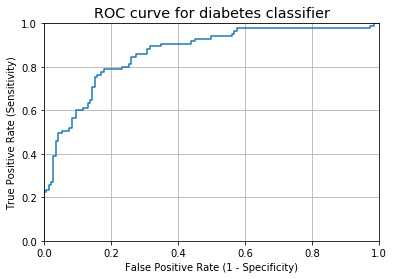

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

When my sensitivity is 0.8 False Positive is 0.2 and So on

#### define a function that accepts a threshold and prints sensitivity and specificity

In [23]:

def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [24]:
evaluate_threshold(0.5)

Sensitivity: 0.5647058823529412
Specificity: 0.904109589041096


In [25]:
evaluate_threshold(0.3)

Sensitivity: 0.8
Specificity: 0.7671232876712328


In [26]:
evaluate_threshold(0.6)

Sensitivity: 0.5176470588235295
Specificity: 0.9178082191780822


##  Summary : 
We successfully analysed the Pima-Indians-diabetes data set and ploteed Receiver Operating Characteristic (ROC) Curves